# SciKit Learn

In [384]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [385]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


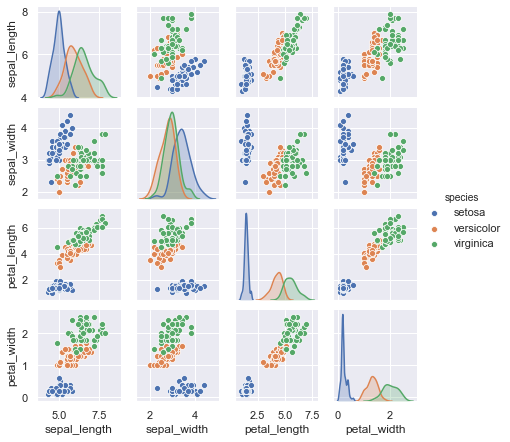

In [386]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [387]:
x_iris  = iris.drop('species',axis=1)
print('shape of features',x_iris.shape)
x_iris.head(2)

shape of features (150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [388]:
y_iris = iris['species']
print('shape of features',y_iris.shape)
y_iris.head(2)

shape of features (150,)


0    setosa
1    setosa
Name: species, dtype: object

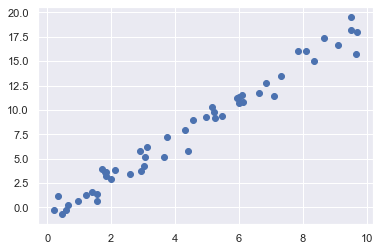

In [389]:
import numpy as np
rng = np.random.RandomState(42)
x=10*rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x,y)

### Linear Regression

In [390]:
from sklearn.linear_model import LinearRegression

In [391]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [392]:
x.shape

(50,)

In [393]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [394]:
model.fit(X,y)

LinearRegression()

In [395]:
print ( model.coef_)
print ( model.intercept_)

[1.9776566]
-0.9033107255311164


In [396]:
xfit = np.linspace(-1,11,50)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [397]:
Xfit = x[:,np.newaxis]
Xfit.shape

(50, 1)

In [398]:
yfit = model.predict(Xfit)
yfit[:5]

array([ 6.50380666, 17.89855351, 13.57301578, 10.9360983 ,  2.18220222])

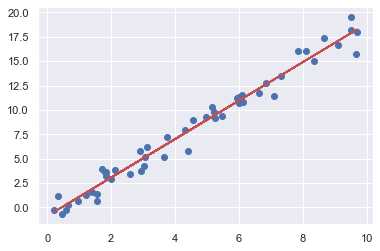

In [399]:
plt.scatter(x,y)
plt.plot(Xfit,yfit,'r-')


### classification, Naive Bayes

In [400]:
from sklearn.model_selection import train_test_split

In [401]:
X_train , X_test , y_train , y_test = train_test_split(x_iris,y_iris)

In [402]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [403]:
from sklearn.metrics import accuracy_score

In [404]:
accuracy_score(y_test,y_model)

0.9210526315789473

### Unsupervised learning dimensionality

In [405]:
from sklearn.decomposition import PCA

In [406]:
model = PCA(n_components=2)
model.fit(x_iris)
X_2d  =model.transform(x_iris)

In [407]:
iris['PCA1']=X_2d[:,0]
iris['PCA2']=X_2d[:,1]

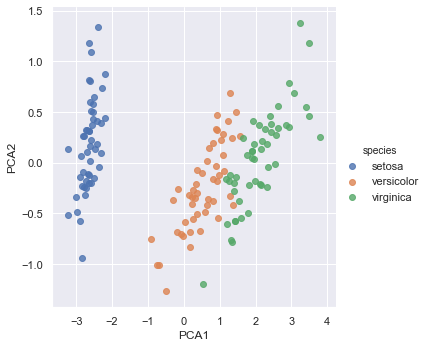

In [408]:
sns.lmplot('PCA1','PCA2',data=iris,hue='species',fit_reg=False)

### Unsupervised learning: Iris clustering

In [409]:
from sklearn  import mixture

In [410]:
model = mixture.GaussianMixture(n_components = 3, covariance_type = 'full')

In [411]:
model.fit(x_iris)
y_model = model.predict(x_iris)

In [412]:
iris['cluster'] = y_model

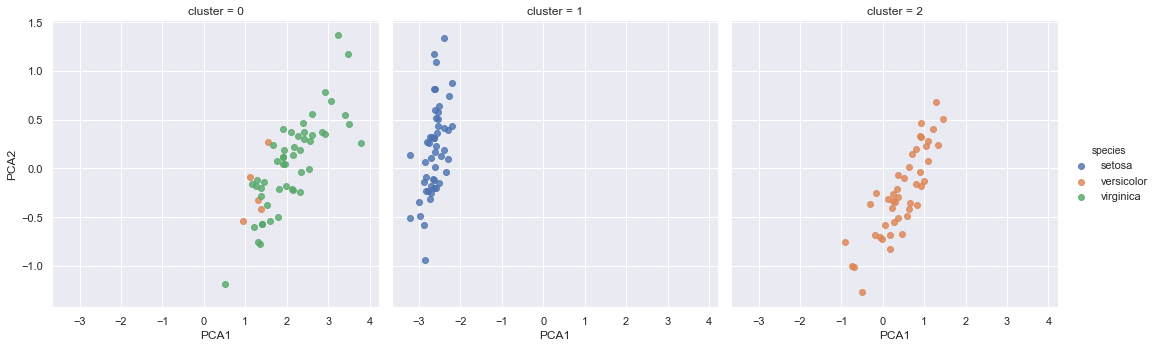

In [413]:
sns.lmplot('PCA1','PCA2',data = iris,hue='species',col='cluster',fit_reg=False);

## Exploring Handwritten Digits

In [414]:
from sklearn.datasets import load_digits

In [415]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

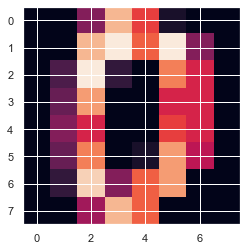

In [416]:
plt.imshow(digits.images[0])

In [417]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

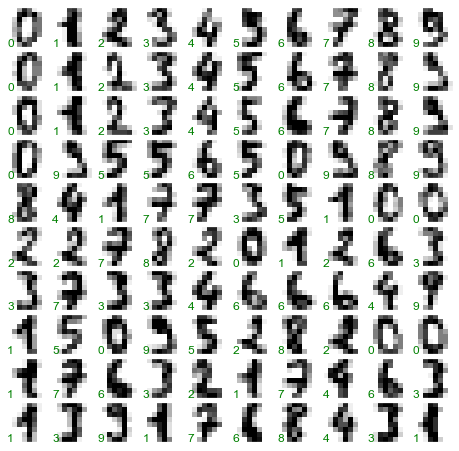

In [418]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0, 0, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In [419]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [420]:
X = digits.data
X.shape

(1797, 64)

In [421]:
y=digits.target
y.shape

(1797,)

#### manifold learning algorithm (Isomap)

In [422]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

(1797, 2)

In [423]:
data_projected

array([[ 167.27247954,   22.18515653],
       [ -48.71476497,   51.30840484],
       [-100.719723  ,   25.82132196],
       ...,
       [ -51.43618206,  -23.29369929],
       [  -0.22056414,  -73.32775967],
       [ -11.36581193,  -36.23661186]])

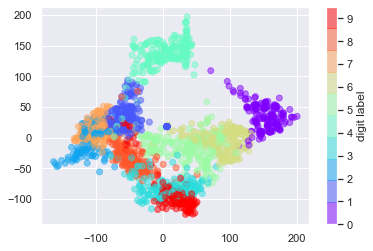

In [424]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=y,edgecolors=None,alpha = 0.5, cmap=plt.cm.get_cmap('rainbow',10))
plt.colorbar(label='digit label',ticks=range(10))
plt.clim(0,9.5)

#### Classification on digits

In [425]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [426]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)

In [427]:
from sklearn.metrics import accuracy_score
print('the accuracy is ',accuracy_score(y_test,y_model))

the accuracy is  0.8333333333333334


In [428]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)

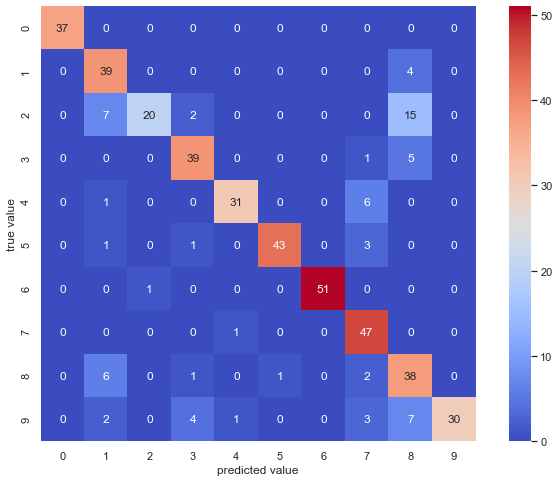

In [429]:
plt.figure(figsize=(12,8))
sns.heatmap(mat,square=True,annot=True,cbar=True,cmap='coolwarm')
plt.xlabel('predicted value')
plt.ylabel('true value');

## Hyperparameters and Model Validation

In [430]:
from sklearn.datasets import load_iris
iris = load_iris()

In [431]:
print(iris.data[:2])
print(iris.target[100:102])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
[2 2]


In [432]:
X=iris.data
y=iris.target

In [433]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)
y_model = model.predict(X)
accuracy_score(y, y_model)

1.0

#### Model validation the right way

In [434]:
x1 , x2 , y1 , y2 = train_test_split(X,y,test_size=0.5,random_state=0)

In [435]:
model.fit(x1,y1)
y2_model = model.predict(x2)
accuracy_score(y2,y2_model)

0.9066666666666666

#### cross-validation

In [436]:
#where each subset of the data is used both as a training set and as a validation set

In [437]:
y2_model = model.fit(x1,y1).predict(x2)
y1_model = model.fit(x2,y2).predict(x1)

In [438]:
print('first trail:', accuracy_score(y2,y2_model))
print('second trail:', accuracy_score(y1,y1_model))

first trail: 0.9066666666666666
second trail: 0.96


In [439]:
from sklearn.model_selection import cross_val_score
cross_val_score(model , X,y , cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [440]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model , X , y , cv =LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [441]:
print(np.mean(scores))

0.96


#### polynomial features.

In [442]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline

In [443]:
def PolynomialRegression (degree = 2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree) , LinearRegression(**kwargs))

In [444]:
def make_data(N,err=1.0,rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1)**2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y+=err * rng.randn(N)
    return (X,y)

In [445]:
X,y = make_data(40)

In [446]:
import seaborn; seaborn.set()

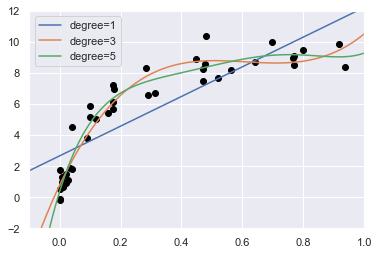

In [447]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [448]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,'polynomialfeatures__degree',degree, cv=7)

D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


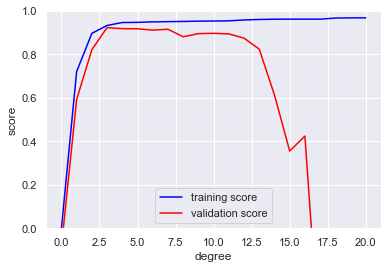

In [449]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [450]:
X.ravel().shape

(40,)

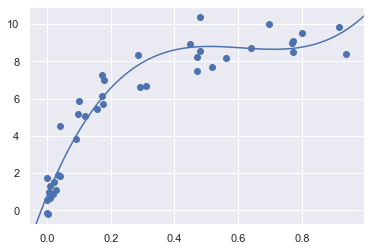

In [451]:
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test);
plt.axis(lim);

#### Grid Search

In [452]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}

In [453]:
grid = GridSearchCV(PolynomialRegression(),param_grid,cv=7)
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [454]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [455]:
model=grid.best_estimator_

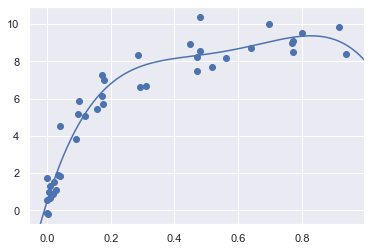

In [456]:
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test);
plt.axis(lim);

## Feature Engineering

#### Categorical Features

In [457]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [458]:
data2=pd.DataFrame(data=data)
data2

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


In [459]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False,dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [460]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [461]:
# another way but using sparse
vec = DictVectorizer(sparse=True, dtype=int)
X=vec.fit_transform(data)

In [462]:
new_data = pd.DataFrame(data=X.toarray(),columns=vec.get_feature_names())
new_data

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


#### Text Features

In [463]:
sample = ['problem of evil','evil queen','horizon problem']

In [464]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)

In [465]:
count_sample = pd.DataFrame(data=X.toarray(),columns=vec.get_feature_names())
count_sample

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [466]:
# I am using another way to convert text to numerical arrays
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)

In [467]:
tfidf_sample = pd.DataFrame(data=X.toarray(),columns=vec.get_feature_names())
tfidf_sample

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


#### Derived Features

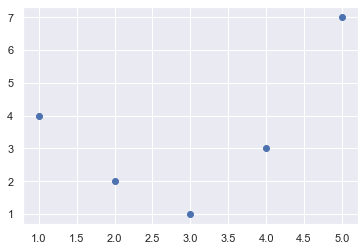

In [468]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

In [469]:
X = x[:,np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)

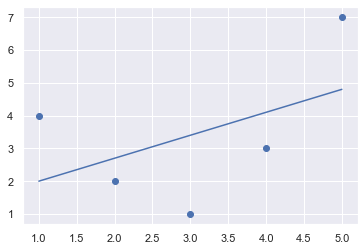

In [470]:
plt.scatter(X,y);
plt.plot(X,yfit)

In [471]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
X2 = poly.fit_transform(X)

In [472]:
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


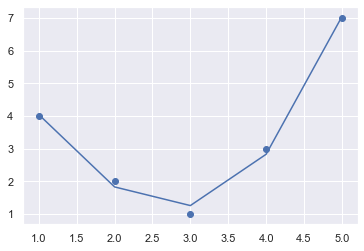

In [473]:
model = LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(X,y)
plt.plot(X,yfit)

#### Imputation of Missing Data

In [474]:
from numpy import nan
X = np.array([[ np.NaN, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, nan, 6 ],
              [ 8, 8, 1 ]])

y = np.array([14, 16, -1, 8, -5])

In [475]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean',missing_values=nan)
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [476]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
yfit

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

#### Feature Pipelines

In [477]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),PolynomialFeatures(degree=3),LinearRegression())

In [478]:
model.fit(X, y) # X with missing values, from above

print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


# Linear Regression

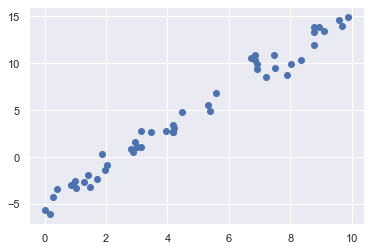

In [674]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

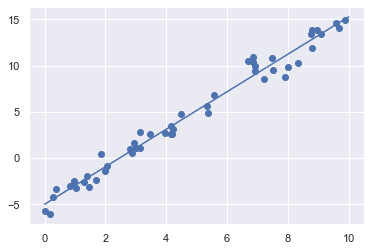

In [675]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 100)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [676]:
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:  2.027208810360695
Model intercept: -4.998577085553202


#### multidimensional

In [677]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000064
[ 1.5 -2.   1. ]


#### Polynomial basis functions

In [678]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([2,3,4])
poly = PolynomialFeatures(4,include_bias=False)
poly.fit_transform(x[:,np.newaxis])

array([[  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.]])

In [679]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

#### sine wave

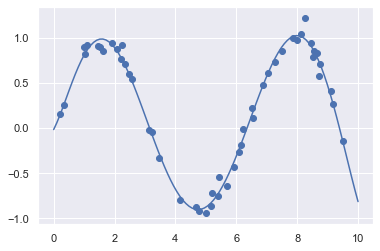

In [680]:
x = rng.rand(50)*10
y = np.sin(x)+0.1*rng.randn(50)
poly_model.fit(x[:,np.newaxis],y)
yfit = poly_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)


#### Gaussian basis functions

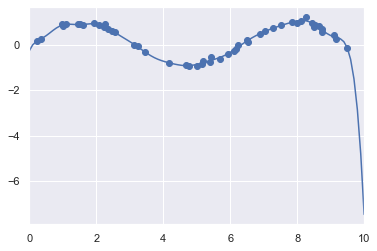

In [681]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Regularization

#### ridge regression or L2 regularization,

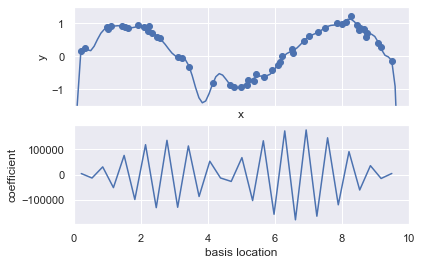

In [682]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
    model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
    ylabel='coefficient',
    xlim=(0, 10))
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

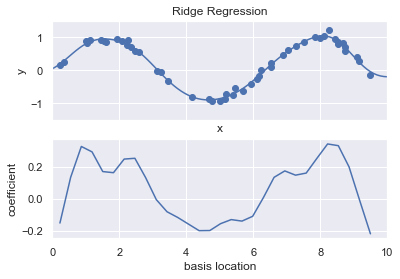

In [683]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

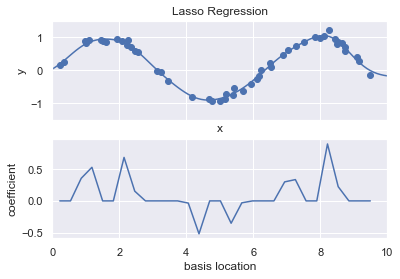

In [684]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30),Lasso(alpha=.001))
basis_plot(model,title='Lasso Regression')

## Example: Predicting Bicycle Traffic

In [719]:
counts = pd.read_csv('fremont_hourly.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('SeaTacWeather.csv', index_col='DATE', parse_dates=True)

In [720]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)

In [721]:
daily = daily[['Total']]
daily.head()

,Total
Date,
2012-10-02,1938.0
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0


In [747]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [749]:
daily.head(2)

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
